# Language Classification with Naive Bayes in Python
* Classifier based on naive bayes
* Classify 3 languages English,Slovak and Czech







In [71]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import string
from collections import defaultdict
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import pickle as pkl
from helper_code import *

<a id=''></a>
# Data Exploration and Visualization

In [18]:
#Fuction to load data
def open_file(filename):
    with open(filename, 'r') as f:
        data = f.readlines()
    return data

In [19]:
data_raw = dict()
data_raw['sk'] = open_file('Data/Sentences/train_sentences.sk')
data_raw['cs'] = open_file('Data/Sentences/train_sentences.cs')
data_raw['en'] = open_file('Data/Sentences/train_sentences.en')

In [20]:
#Function to show data stats
def show_statistics(data):
    for language, sentences in data.items():
        
        number_of_sentences = 0
        number_of_words = 0
        number_of_unique_words = 0
        sample_extract = ''
        
        word_list = ' '.join(sentences).split()
        
        number_of_sentences = len(sentences)
        number_of_words = len(word_list)
        number_of_unique_words = len(set(word_list))
        sample_extract = ' '.join(sentences[0].split()[0:7])
        
        
        print(f'Language: {language}')
        print('-----------------------')
        print(f'Number of sentences\t:\t {number_of_sentences}')
        print(f'Number of words\t\t:\t {number_of_words}')
        print(f'Number of unique words\t:\t {number_of_unique_words}')
        print(f'Sample extract\t\t:\t {sample_extract}...\n')

In [21]:
show_statistics(data_raw)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 2016
Number of unique words	:	 1322
Sample extract		:	 Pán de Grandes Pascual jasne vysvetlil, aká...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 158
Number of unique words	:	 141
Sample extract		:	 Upozorňujeme, že jejím cílem je šetřit penězi...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 2381
Number of unique words	:	 1037
Sample extract		:	 I can understand your approach a little...



<a id='task2'></a>
# Data Cleaning and Preprocessing

In [22]:
'''
Removes punctuation and digits from a string, and converts all characters to lowercase. 
Also clears all \n and hyphens (splits hyphenated words into two words).
'''  
def preprocess(text):  
    preprocessed_text = text  
    preprocessed_text = text.lower().replace('-', ' ')
    translation_table = str.maketrans('\n', ' ', string.punctuation+string.digits)
    preprocessed_text = preprocessed_text.translate(translation_table)
    return preprocessed_text

In [23]:
data_preprocessed = {k: [preprocess(sentence) for sentence in v] for k, v in data_raw.items()}

In [24]:
print('\nPreprocessed data')
show_statistics(data_preprocessed)


Preprocessed data
Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 1996
Number of unique words	:	 1207
Sample extract		:	 pán de grandes pascual jasne vysvetlil aká...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 155
Number of unique words	:	 133
Sample extract		:	 upozorňujeme že jejím cílem je šetřit penězi...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 2366
Number of unique words	:	 904
Sample extract		:	 i can understand your approach a little...



<a id='task3'></a>
# Using Naive Bayes Model

## Vectorizing Training Data

In [25]:
sentences_train,y_train = [],[]
for k,v in data_preprocessed.items():
    for sentence in v:
        sentences_train.append(sentence)
        y_train.append(k)

In [26]:
vectorizer = CountVectorizer()

In [27]:
x_train=vectorizer.fit_transform(sentences_train)

## Initializing Model Parameters and Training

In [28]:
naive_classifier = MultinomialNB()
naive_classifier.fit(x_train,y_train)

MultinomialNB()

## Vectorizing Validation Data and Evaluating Model

In [29]:
data_val = dict()
data_val['sk'] = open_file('Data/Sentences/val_sentences.sk')
data_val['cs'] = open_file('Data/Sentences/val_sentences.cs')
data_val['en'] = open_file('Data/Sentences/val_sentences.en')

data_val_preprocessed = {k: [preprocess(sentence) for sentence in v ] for k, v in data_val.items()} 


In [30]:
sentences_val, y_val = [], []
for k, v in data_val_preprocessed.items():
    for sentence in v:
        sentences_val.append(sentence)
        y_val.append(k)

In [31]:
x_val= vectorizer.transform(sentences_val)

In [32]:
predictions = naive_classifier.predict(x_val)

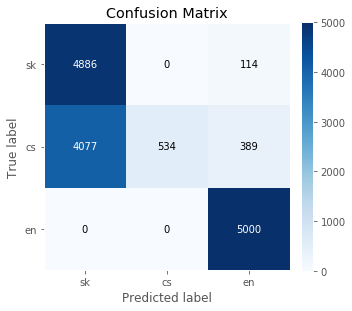

In [33]:
plot_confusion_matrix(y_val, predictions, ['sk', 'cs', 'en'])

In [34]:
f1_score(y_val,predictions,average='weighted')

0.6149824401040264

<a id='task4'></a>
# Adjusting Hyperparameters

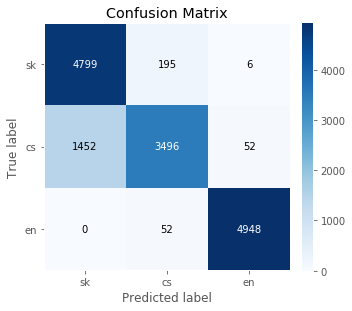

In [35]:
naive_classifier = MultinomialNB(alpha=0.04, fit_prior=False)
naive_classifier.fit(x_train,y_train)

predictions = naive_classifier.predict(x_val)

plot_confusion_matrix(y_val,predictions, ['sk','cs','en'])

In [36]:
f1_score(y_val,predictions,average='weighted')

0.88060393899013

# Saving th model

In [37]:
joblib.dump(naive_classifier, 'Data/Models/final_model.joblib')
joblib.dump(vectorizer, 'Data/Vectorizers/final_model.joblib')


['Data/Vectorizers/final_model.joblib']

<a id='task4'></a>
# Hosted using streamlit 